<a href="https://colab.research.google.com/github/Jasper-Rowan/GreenVaultTokenomics/blob/main/GreenVault_Tokenomics_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAO Class

In [13]:



#value of unmined gold relative to ounces in the ground. 
UNMINED_GOLD_DISCOUNT = .25

class GreenVaultDAO: 
  """A class representing the state of the DAO"""

  def __init__(self, total_ore, ore_in_treasury): 
    if total_ore < ore_in_treasury: 
      raise ValueError("Tried to put more ore in treasury then ore in existence. Please reduce number of the ore in treasury or increase the number of total ore.")
    
    self.total_ounces = 0
    self.carbon_credits = 0
    self.biodiversity_credits = 0
    self.ore_in_treasury = ore_in_treasury
    self.total_ore = total_ore
    self.dollars_in_treasury = 0

  def buy_gold(self, ounces_bought, price_per_ounce, biodiversity_per_ounce, carbon_credit_per_ounce):
    if price_per_ounce * ounces_bought > self.dollars_in_treasury:
      raise ValueError("Treasury doesn't contain enough dollars to buy requested gold. Please reduce amount of gold or liquidate treasury")
    self.total_ounces += ounces_bought
    self.dollars_in_treasury -= price_per_ounce * ounces_bought
    self.biodiversity_credits += biodiversity_per_ounce * ounces_bought
    self.carbon_credits += carbon_credit_per_ounce * ounces_bought

  def liquidate_treasury(self, amount_of_ore_to_sell, price_of_ore): 
    if amount_of_ore_to_sell > self.ore_in_treasury: 
      raise ValueError("Attempted to liquidate more ore then exist in the treasury")
    self.dollars_in_treasury += amount_of_ore_to_sell * price_of_ore
    self.ore_in_treasury -= amount_of_ore_to_sell
  
  def liquidate_carbon_credits(self, carbon_credits_sold, price_per_credit):
    if carbon_credits_sold > self.carbon_credits: 
      raise ValueError("Attempted to liquidate more carbon credits then exist in the treasury")
    
    self.dollars_in_treasury += carbon_credits_sold * price_per_credit 
    self.carbon_credits -= carbon_credits_sold

  def liquidate_biodiversity_credits(self, biodiversity_credits_sold, price_per_credit):
    if biodiversity_credits_sold > self.biodiversity_credits: 
      raise ValueError("Attempted to liquidate more biodiversity credits then exist in the treasury")
    self.dollars_in_treasury += biodiversity_credits_sold * price_per_credit 
    self.biodiversity_credits -= biodiversity_credits_sold

  def ounces_per_ore(self): 
    return self.total_ounces / self.total_ore

  def carbon_credit_per_ore(self): 
    return self.carbon_credits / self.total_ore

  def biodiversity_credit_per_ore(self): 
    return self.biodiversity_credits / self.total_ore

  def ounces_per_ore_outstanding(self): 
    ore_outstanding = self.total_ore - self.ore_in_treasury
    return self.total_ounces / ore_outstanding

  def carbon_credit_per_ore_outstanding(self): 
    ore_outstanding = self.total_ore - self.ore_in_treasury
    return self.carbon_credits / ore_outstanding

  def biodiversity_credit_per_ore_outstanding(self): 
    ore_outstanding = self.total_ore - self.ore_in_treasury
    return self.biodiversity_credits / ore_outstanding

  def ore_price(self, carbon_credit_price, biodiversity_credit_price, gold_price, growth_assumption=lambda x: x * 1.3):
    """
    The value of ore is four components: 
    1) Price of gold adjusted for the discount that comes with being unmined gold. 
    2) The average price of the carbon credits in the treasury. 
    3) The average price of the biodiversity credits in the treasury. 
    4) The $ORE premium that comes from growth assumptions. 
    """

    unmined_gold_price = gold_price * UNMINED_GOLD_DISCOUNT

    unmined_gold_total_value = unmined_gold_price * self.total_ounces
    carbon_credits_total_value = self.carbon_credits * carbon_credit_price
    biodiversity_credits_total_value = self.biodiversity_credits * biodiversity_credit_price
    TVL = unmined_gold_total_value + carbon_credits_total_value + biodiversity_credits_total_value

    ore_outstanding = self.total_ore - self.ore_in_treasury

    return growth_assumption(TVL) / ore_outstanding

  def treasury_value(self, carbon_credit_price, biodiversity_credit_price, gold_price): 
    return (self.ore_price(carbon_credit_price, biodiversity_credit_price, gold_price) * self.ore_in_treasury) + (self.dollars_in_treasury)



  
      

  

# Install needed modules.

In [12]:
!pip install yfinance

# DAO Class Basic Testing

In [14]:
dao = GreenVaultDAO(200, 110)
dao.buy_gold(100, 0, 0, 0)
print("ounces_per_ore_outstanding: ", dao.ounces_per_ore_outstanding())
ore_price = dao.ore_price(0, 0, 1800)
print("ORE price: ", ore_price)
print("total ounces: ", dao.total_ounces)
print("dollars in treasury: ", dao.dollars_in_treasury)

dao.liquidate_treasury(10, ore_price)
ore_price = dao.ore_price(0, 0, 1800)

print("---------liquidates treasury------------")
print("ORE price: ", ore_price)
print("total ounces: ", dao.total_ounces)
print("ounces_per_ore_outstanding: ", dao.ounces_per_ore_outstanding())
print("dollars in treasury: ", dao.dollars_in_treasury)

dao.buy_gold(200, 30, 0, 0)
ore_price = dao.ore_price(0, 0, 1800)
print("---------buys gold------------")
print("ORE price: ", ore_price)
print("total ounces: ", dao.total_ounces)
print("ounces_per_ore_outstanding: ", dao.ounces_per_ore_outstanding())
print("dollars in treasury: ", dao.dollars_in_treasury)

ounces_per_ore_outstanding:  1.1111111111111112
ORE price:  650.0
total ounces:  100
dollars in treasury:  0
---------liquidates treasury------------
ORE price:  585.0
total ounces:  100
ounces_per_ore_outstanding:  1.0
dollars in treasury:  6500.0
---------buys gold------------
ORE price:  1755.0
total ounces:  300
ounces_per_ore_outstanding:  3.0
dollars in treasury:  500.0


# Growth statistics over the first year 

total_ore:  2,000,000,000
initial_ore_in_treasury:  1,000,000,000
gold_added_each_month:  79,545.45454545454
Gold prices used [1821.0000610351562, 1790.2999877929688, 1740.3999328613281, 1747.2999572753906, 1641.4999389648438, 1685.5000305175781, 1672.2000122070312, 1659.2999267578125, 1641.9999694824219, 1713.0999755859375, 1696.4999389648438, 1750.0]
x_axis: total gold ounces in DAO:  [125000, 204545.45454545453, 284090.90909090906, 363636.3636363636, 443181.8181818181, 522727.27272727265, 602272.7272727272, 681818.1818181818, 761363.6363636364, 840909.0909090909, 920454.5454545455, 1000000.0000000001]
y_axis top: ORE price [0.07397812747955322, 0.11901426055214621, 0.16069033471020785, 0.20649908585981888, 0.23643195143612947, 0.28634347109361125, 0.3273141501166603, 0.3676857792247426, 0.4063016969940879, 0.46818243650956587, 0.5075041010596536, 0.5687500000000001]
y_axis bottom: values of the different ounce per ORE values [0.000125, 0.00020454545454545454, 0.0002840909090909091, 

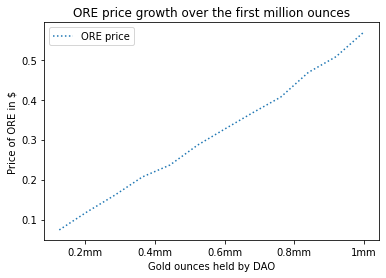

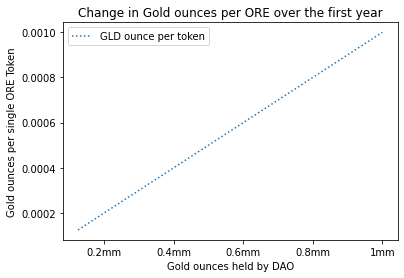

In [15]:
############################ ORE price growth over the first million ounces ############################

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

gld = yf.Ticker("GLD") #Grab data from yahoo finance


#Define the initial data; initial number of tokens, initial gold vaulted, etc.
total_ore = 2000000000
initial_ore_in_treasury = 1000000000
INITIAL_OUNCES = 125000

print("total_ore: ", "{:,}".format(total_ore))
print("initial_ore_in_treasury: ", "{:,}".format(initial_ore_in_treasury))

#Create a model of the DAO with a fixed number of tokens where 125k ounces are
#added each month for one year starting with 125k ounces so that there are 
#1 million ounces at the end of the year
dao = GreenVaultDAO(total_ore, initial_ore_in_treasury)
ROUNDS = 12
gld_prices = []
ounce_per_ore_values = []
ore_prices = []
total_ounces = []
dao.buy_gold(INITIAL_OUNCES, 0, 0, 0)
gold_added_each_month = (1000000 - INITIAL_OUNCES) / (ROUNDS - 1)
print("gold_added_each_month: ", "{:,}".format(gold_added_each_month))

for i in range(ROUNDS): 
  gold_price = gld.history(period='365d')['High'][round(365/(ROUNDS - 1)) * i] * 10
  gld_prices += [gold_price]
  ounce_per_ore_values  += [dao.ounces_per_ore_outstanding()]
  ore_prices += [dao.ore_price(0, 0, gold_price)]
  total_ounces += [dao.total_ounces] 
  dao.buy_gold(gold_added_each_month, 0, 0, 0)

print("Gold prices used", gld_prices)
x_axis = total_ounces
y_axis = ore_prices
print("x_axis: total gold ounces in DAO: ", x_axis)
print("y_axis top: ORE price", y_axis)

#Create the plot of the data above
fig, ax = plt.subplots() 
plt.xlabel('Gold ounces held by DAO')
plt.ylabel('Price of ORE in $')
plt.xticks([200000, 400000, 600000, 800000, 1000000]) #Set the values of the x_axis tick marks
labels = ["0.2mm", "0.4mm", "0.6mm", "0.8mm", "1mm"] #Give the ticks labels
ax.set_xticklabels(labels)
plt.title("ORE price growth over the first million ounces")
#TODO make use a string formater to do this automagically
ax.plot(x_axis, y_axis, label='ORE price', linestyle=':');  # Plot some data on the axes.
plt.legend();


y_axis = ounce_per_ore_values
print("y_axis bottom: values of the different ounce per ORE values", y_axis)

#Create the plot of the data above
fig, ax = plt.subplots() 
plt.xlabel('Gold ounces held by DAO')
plt.ylabel('Gold ounces per single ORE Token')
plt.xticks([200000, 400000, 600000, 800000, 1000000]) #Set the values of the x_axis tick marks
labels = ["0.2mm", "0.4mm", "0.6mm", "0.8mm", "1mm"] #Give the ticks labels
ax.set_xticklabels(labels)
plt.title("Change in Gold ounces per ORE over the first year")
#TODO make use a string formater to do this automagically
ax.plot(x_axis, y_axis, label='GLD ounce per token', linestyle=':');  # Plot some data on the axes
plt.legend();


# Growth statistics in subsequent years selling tokens to fund new projects.

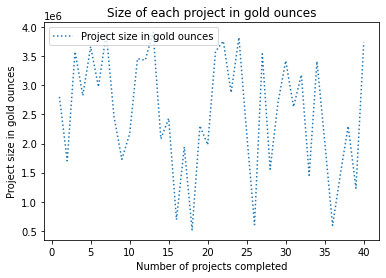

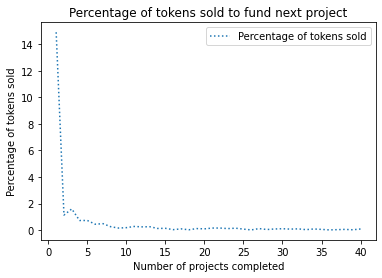

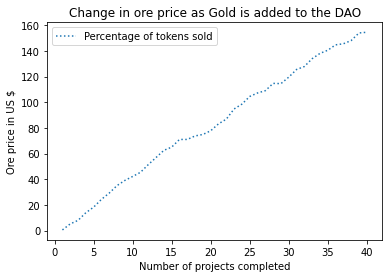

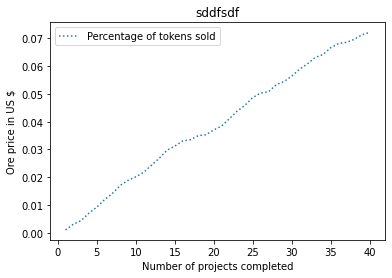

In [21]:
dao = GreenVaultDAO(2000000000, 1000000000)
dao.buy_gold(1000000, 0, 0, 0)

#Project size will range from 500,000 - 4,000,000 Ounces. 
PROJECT_SIZE_MIN = 500000
PROJECT_SIZE_MAX = 4000000
CARBON_CREDIT_PRICE = 14
BIO_CREDIT_PRICE = 6000
ROUNDS = 40
GOLD_ACQUISITION_PRICE = 30  #We assume that it will cost $30 to aquire 1 ounce of gold


project_sizes = []
ore_prices = []
ounces_per_ore_lst = []
percentage_changes = []


# In this model we will randomly sample a value between PROJECT_SIZE_MIN and PROJECT_SIZE_MAX and take 
# this to be the size of the next project in gold ounces. We will repeat this process ROUNDS number of times.
for i in range(ROUNDS): 
  ounces_per_ore_lst += [dao.ounces_per_ore_outstanding()]
  # print("ounces_per_ore_outstanding: ", dao.ounces_per_ore_outstanding())
  ore_price = dao.ore_price(14, 6000, gld.history(period='365d')['High'][np.random.randint(250)] * 10)
  ore_prices += [ore_price]
  # print("ORE price: ", ore_price)
  # print("total ounces: ", dao.total_ounces)

  ore_in_treasury_pre_liquidation = dao.ore_in_treasury
  # print("ore in treasury pre-liquidation: ", ore_in_treasury_pre_liquidation)
  ounces_to_buy = np.random.randint(PROJECT_SIZE_MIN, high=PROJECT_SIZE_MAX)
  project_sizes += [ounces_to_buy]
  # print("Project Size: ", ounces_to_buy)
  dollars_needed_for_aq = ounces_to_buy * GOLD_ACQUISITION_PRICE
  ore_to_sell = dollars_needed_for_aq / ore_price
  # print("ORE sold: ", ore_to_sell)
  dao.liquidate_treasury(ore_to_sell, ore_price)
  ore_in_treasury_post_liquidation = dao.ore_in_treasury
  # print("ore in treasury post-liquidation: ", ore_in_treasury_post_liquidation)
  percentage_change = round(-(ore_in_treasury_post_liquidation - ore_in_treasury_pre_liquidation) / ore_in_treasury_pre_liquidation * 100, 2) 
  percentage_changes += [percentage_change]
  # print("Percentage Change: ", percentage_change)

  # print("dollars in treasury: ", dao.dollars_in_treasury)
  dao.buy_gold(ounces_to_buy * .90, 30, .2, 2)
  # print("dollars in treasury: ", dao.dollars_in_treasury)

  ore_price = dao.ore_price(14, 6000, gld.history(period='365d')['High'][np.random.randint(250)] * 10)
  # print("ORE price: ", ore_price)
  # print("--------------------------")

num_rounds = [i for i in range(1, ROUNDS + 1)]


#
fig, ax = plt.subplots() 
plt.title("Size of each project in gold ounces")
plt.ylabel('Project size in gold ounces')
plt.xlabel('Number of projects completed')
ax.plot(num_rounds, project_sizes, label='Project size in gold ounces', linestyle=':');  # Plot some data on the axes.
plt.legend();


fig, ax = plt.subplots() 
plt.title("Percentage of tokens sold to fund next project")
plt.ylabel('Percentage of tokens sold')
plt.xlabel('Number of projects completed')
ax.plot(num_rounds, percentage_changes, label='Percentage of tokens sold', linestyle=':');  # Plot some data on the axes.
plt.legend();

fig, ax = plt.subplots() 
plt.title('Change in ore price as Gold is added to the DAO')
plt.ylabel('Ore price in US $')
plt.xlabel('Number of projects completed')
ax.plot(num_rounds, ore_prices, label='ore price', linestyle=':');  # Plot some data on the axes.
plt.legend();

fig, ax = plt.subplots() 
plt.title('sddfsdf')
plt.ylabel('Ore price in US $')
plt.xlabel('Number of projects completed')
ax.plot(num_rounds, ounces_per_ore_lst, label='Percentage of tokens sold', linestyle=':');  # Plot some data on the axes.
plt.legend();




# Slider Examples 